# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [15]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [18]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# make_circles: A simple toy dataset to visualize clustering and classification algorithms.

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
print (f'noisy_circles[0].shape={noisy_circles[0].shape}')
print (f'noisy_circles[1].shape={noisy_circles[1].shape}')
noisy_circles

noisy_circles[0].shape=(1500, 2)
noisy_circles[1].shape=(1500,)


(array([[-0.15699376, -1.00004038],
        [-0.15994307,  0.57950906],
        [ 0.2444644 , -0.88938551],
        ...,
        [-0.05872284,  0.46062171],
        [ 0.05100988,  0.51316108],
        [ 0.33925201, -0.96197127]]),
 array([0, 1, 0, ..., 1, 1, 0], dtype=int64))

In [17]:
# Anisotropically distributed data

# anisotropic : 各向異性
#   材料的性質或強度在各不同的方向均為一致時，這種材料稱為具有等向性(isotropic)；
#   反之，材料的性質或強度因方向不同而有差異者，則稱為非等向性材料。

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
print(f'X_aniso.shape={X_aniso.shape}')
aniso = (X_aniso, y)

X_aniso.shape=(1500, 2)


In [20]:
# blobs with varied variances
# make_blobs:
#    Generate isotropic Gaussian blobs for clustering
#    cluster_std : The standard deviation of the clusters
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
print(f'varied[0].shape={varied[0].shape}, varied[1].shape={varied[1].shape}')

varied[0].shape=(1500, 2), varied[1].shape=(1500,)


params={'n_neighbors': 10, 'n_clusters': 3} before update
params={'n_neighbors': 10, 'n_clusters': 2}, algo_params={'n_clusters': 2}
plot=1, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(2,), colors=['#377eb8' '#ff7f00']
plot=2, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(2,), colors=['#377eb8' '#ff7f00']
plot=3, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(2,), colors=['#377eb8' '#ff7f00']
params={'n_neighbors': 10, 'n_clusters': 3} before update
params={'n_neighbors': 2, 'n_clusters': 3}, algo_params={'n_neighbors': 2}
plot=4, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(3,), colors=['#377eb8' '#ff7f00' '#4daf4a']
plot=5, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(3,), colors=['#377eb8' '#ff7f00' '#4daf4a']
plot=6, len(full_datasets)=3,  len(clustering_algorithms)=3
colors.shape=(3,), colors=['#377eb8' '#ff7f00' '#4daf4a']
params={'n_neighbors': 10, 'n_clusters': 3} before updat

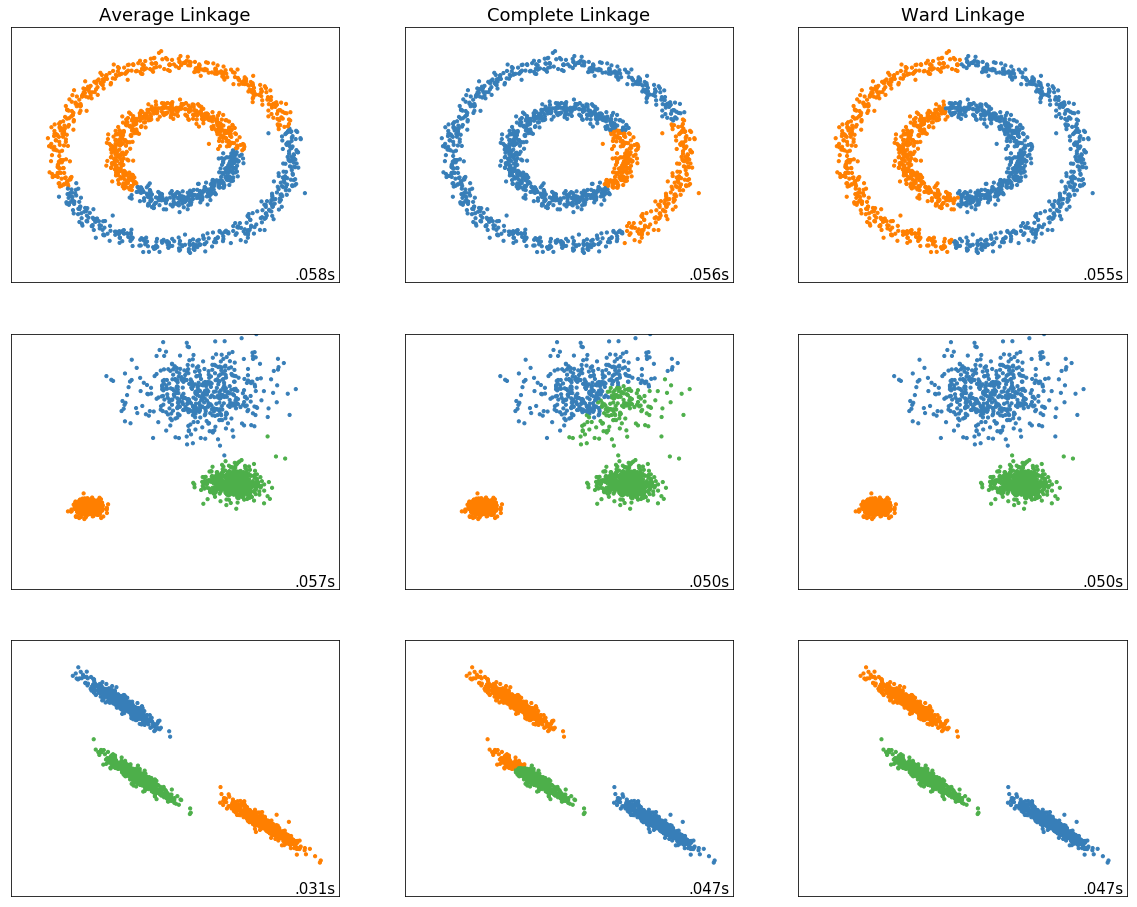

In [31]:
# 設定群集與繪圖參數
plt.figure(figsize=(20, 16))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}

full_datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors': 2}), (aniso, {'n_neighbors': 2})]


# 執行各種樣板資料的繪圖迴圈
for i_dataset, (sub_dataset, algo_params) in enumerate(full_datasets):
    # 複製參數與標準化
    params = default_base.copy()
    print(f'params={params} before update')
    # update: updates the dictionary with the elements from the another dictionary object or from an iterable of key/value pairs
    params.update(algo_params)
    print(f'params={params}, algo_params={algo_params}')
    X, y = sub_dataset
    
    '''
    class sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)[source]
    
    Standardize features by removing the mean and scaling to unit variance
    '''
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        '''
        Set up subplot
        '''
        print(f'plot={plot_num}, len(full_datasets)={len(full_datasets)},  len(clustering_algorithms)={len(clustering_algorithms)}')
        plt.subplot(len(full_datasets), len(clustering_algorithms), plot_num)
        
        '''
        Draw title
        '''
        if i_dataset == 0:
            plt.title(name, size=18)

        '''
        Draw each dots to scatter diagram
        '''
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        print(f'colors.shape={colors.shape}, colors={colors}')
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        '''
        Draw time elapse 
        '''
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.3fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

# 觀察結果

* 同心圓 : 三者效果中 Complete 的效果似乎是最差
> Answer: Complete is worst

* Isotropic 三群 : Average 與 Ward 效果都還不錯
> Answer: Yes

* 斜三群 : 三者效果也是以 Complete 較差
> Anser: Complete is worst

# 同學可以試著替換不同的 random_state 觀察, 會有不同的結果

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同